In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [79]:
!ls ../build

CMakeCache.txt	     Makefile		  rdecay02_h1_H15.csv
CMakeFiles	     plotHisto.C	  rdecay02_h1_H16.csv
cmake_install.cmake  rdecay02_h1_H10.csv  rdecay02.mac
debug.mac	     rdecay02_h1_H11.csv  rdecay02_nt_RDecayProducts.csv
G4History.macro      rdecay02_h1_H12.csv  rdecay02_nt_RDecayProducts_t0.csv
init_vis.mac	     rdecay02_h1_H13.csv  rdecay02_nt_RDecayProducts_t1.csv
main		     rdecay02_h1_H14.csv  vis.mac


In [81]:

!cat "../build/rdecay02_h1_H15.csv"

#class tools::histo::h1d
#title Anti-coincidence spectrum (MeV) in the detector
#dimension 1
#axis fixed 100 0 100
#annotation axis_x.title 
#bin_number 102
entries,Sw,Sw2,Sxw0,Sx2w0
0,0,0,0,0
6554,6554,6554,3749.38,2587.36
3420,3420,3420,4428.02,5882.09
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0

In [68]:


decay_histo = pd.read_csv("../build/rdecay02_h1_H16.csv", header=6);
decay_histo_0 = pd.read_csv("../build/rdecay02_nt_RDecayProducts_t0.csv", 
                            skiprows=10, 
                            names=['PID','Z','A','Energy','Time','Weight'],
                            dtype={'PID':np.int},
                            sep=',');

decay_histo.info()
decay_histo_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
entries    152 non-null int64
Sw         152 non-null int64
Sw2        152 non-null int64
Sxw0       152 non-null float64
Sx2w0      152 non-null float64
dtypes: float64(2), int64(3)
memory usage: 6.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61136 entries, 0 to 61135
Data columns (total 6 columns):
PID       61136 non-null int64
Z         61136 non-null int64
A         61136 non-null int64
Energy    61136 non-null float64
Time      61136 non-null float64
Weight    61136 non-null int64
dtypes: float64(2), int64(4)
memory usage: 2.8 MB


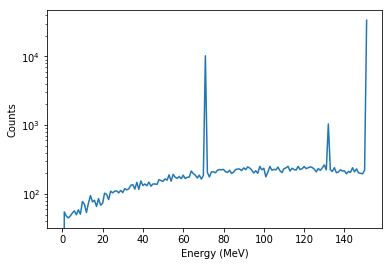

In [78]:

fig = plt.figure();
plt.semilogy(decay_histo["Sw"]);
plt.xlabel("Energy (MeV)");
plt.ylabel("Counts");


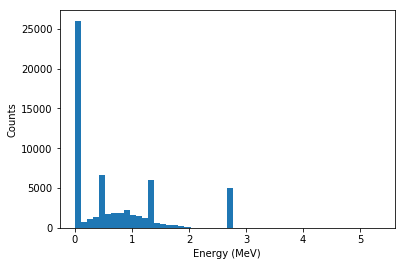

In [75]:

plt.figure();
plt.hist(decay_histo_0['Energy'], bins=50);
plt.xlabel('Energy (MeV)');
plt.ylabel('Counts');
